In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [5]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
X, y = make_moons(100, noise=0.25, random_state=2)

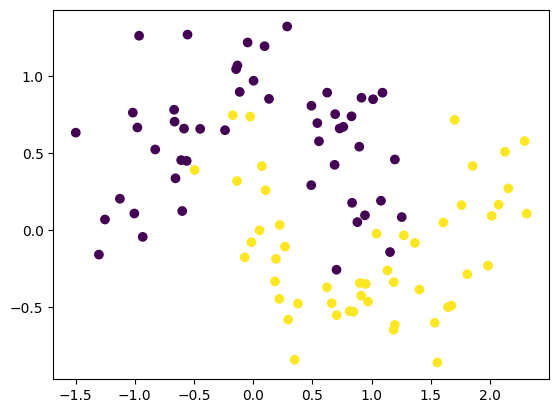

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [8]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
adam = Adam(learning_rate=0.01)

model1.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'] )

history1 = model1.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 15s 2ms/step


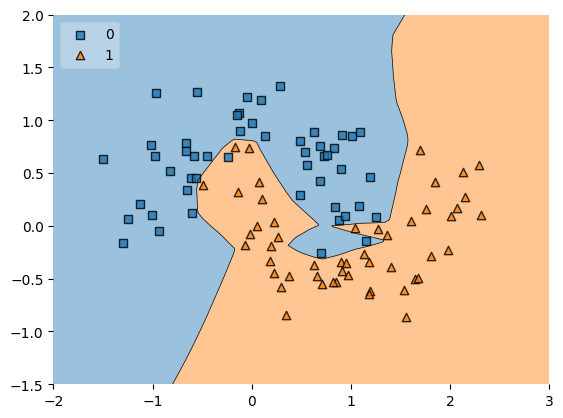

In [11]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

The above plot of the decision boundary shows that our model is overfitting on our training data as it is fitting too well onto the data trying to capture every minute detail instead of generalizing it. We need to tackle it now

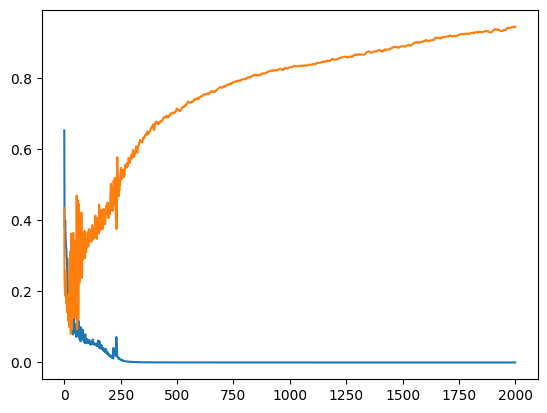

In [12]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [14]:
model2 = Sequential()

model2.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model2.add(Dense(128, activation="relu", kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1, activation="sigmoid"))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
adam = Adam(learning_rate=0.01)

model2.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'] )

history2 = model2.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 16s 2ms/step


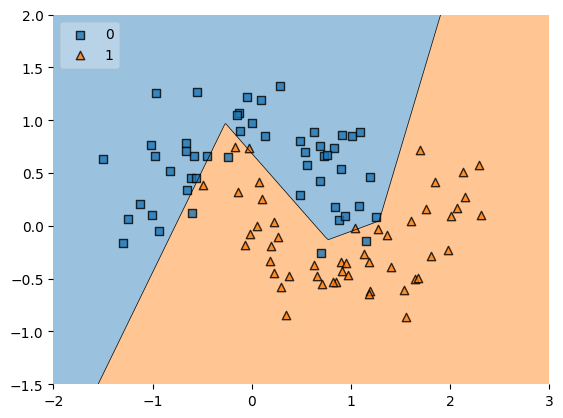

In [16]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

The model has improved from the previous one as the decision boundary now is trying to understand the data pattern instead of just mugging every information

In [23]:
# let's get the first layer weights
model1_w_l1 = model1.get_weights()[0].reshape(256)
model1_w_l1.shape

(256,)

As input layer has 2 units and first layer has 128 units. In total, we'll have 2 * 128 = 256 weights in 1st layer

In [24]:
# let's get the first layer weights
model2_w_l1 = model2.get_weights()[0].reshape(256)
model2_w_l1.shape

(256,)

<Axes: >

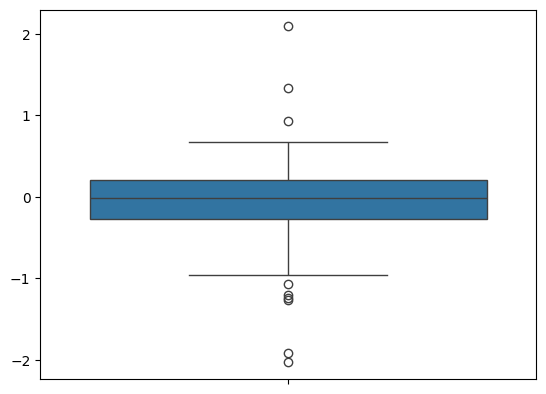

In [25]:
sns.boxplot(model1_w_l1)

<Axes: >

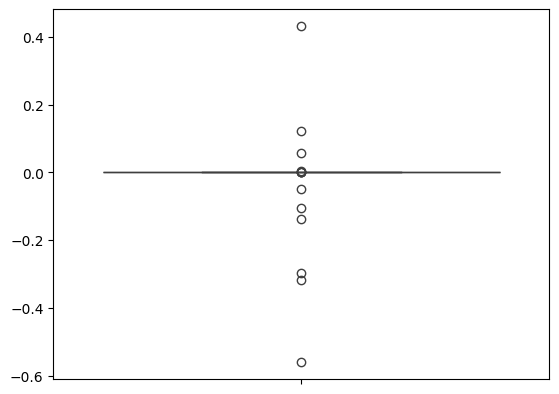

In [26]:
sns.boxplot(model2_w_l1)

So, the weights lie in a range smaller than that of model 1

In [27]:
model1_w_l1.max()

2.0905504

In [28]:
model2_w_l1.max()

0.4328112

So, from above cases it can proved that regularization makes the weights go towards 0

In [29]:
model1_w_l1.min()

-2.0306475

In [30]:
model2_w_l1.min()

-0.56023467

<ipython-input-33-028b5e12d89c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_w_l1)
<ipython-input-33-028b5e12d89c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_w_l1)


<Axes: ylabel='Density'>

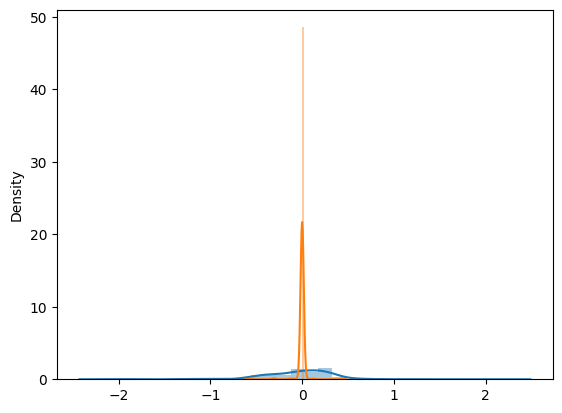

In [33]:
sns.distplot(model1_w_l1)
sns.distplot(model2_w_l1)


The Blue curve is of the model without regularisation and the orange is for the one with regularization. The blue is more spread than the orange. As the regularization makes the weights move towards 0.